# Simple EDA

In [1]:
# Reload imported code automatically.
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

sys.path.append("..")
from src import utils

In [3]:
matplotlib.rc("font", **{"size": 14})

## Params

In [4]:
DF_PATH = os.path.join("..", "data", "carsWithImages.csv")

## Data

In [5]:
df = pd.read_csv(DF_PATH, index_col=0)
df.head()

,Url,Autovit Id,Pret,Oferit de,Categorie,Marca,Model,Versiune,Anul,Km,...,Capacitate baterie,Tuning,Predare leasing,Plata initiala (la predare),Valoare rata lunara,Numar de rate lunare ramase,Valoare reziduala,Contract baterie,Volan pe dreapta,Masina de epoca
0,https://www.autovit.ro/anunt/suzuki-vitara-1-6...,7049990250,16 999 EUR,Proprietar,Autoturisme,Suzuki,Vitara,1.6,2018,26 000 km,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autovit.ro/anunt/toyota-auris-1-8-...,7049960669,12 500 EUR,Proprietar,Autoturisme,Toyota,Auris,1.8 VVT-i Hybrid Automatik Touring Sports,2015,239 465 km,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autovit.ro/anunt/skoda-octavia-1-6...,7049895868,14 994 EUR,Firma,Autoturisme,Skoda,Octavia,1.6 TDI,2020,100 000 km,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autovit.ro/anunt/ford-focus-1-6-td...,7049990021,5 000 EUR,Proprietar,Autoturisme,Ford,Focus,1.6 TDCi DPF,2012,245 000 km,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autovit.ro/anunt/opel-insignia-ID7...,7049990234,17 800 EUR,Proprietar,Autoturisme,Opel,Insignia,NaN,2017,65 000 km,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Columns and missing values

We should identify which columns reference useful data that our user would have.

In [6]:
df.columns

Index(['Url', 'Autovit Id', 'Pret', 'Oferit de', 'Categorie', 'Marca', 'Model',
       'Versiune', 'Anul', 'Km', 'Combustibil', 'Putere',
       'Capacitate cilindrica', 'Norma de poluare', 'Consum Mixt',
       'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Numar de portiere',
       'Culoare', 'Garantie de la producator pana la', 'Tara de origine',
       'Data primei inmatriculari', 'Fara accident in istoric',
       'Carte de service', 'Stare', 'Are VIN (Serie sasiu)', 'Numar locuri',
       'Generatie', 'Transmisie', 'Filtru de particule', 'Emisii CO2',
       'Optiuni culoare', 'Se emite factura', 'Eligibil pentru finantare',
       'Garantie dealer (inclusa in pret)', 'Inmatriculat',
       'Primul proprietar (de nou)', 'Consum Extraurban', 'sau in limita a',
       'Autonomie', 'Consum mediu', 'Capacitate baterie', 'Tuning',
       'Predare leasing', 'Plata initiala (la predare)', 'Valoare rata lunara',
       'Numar de rate lunare ramase', 'Valoare reziduala', 'Contract 

Most of the columns have many missing values.

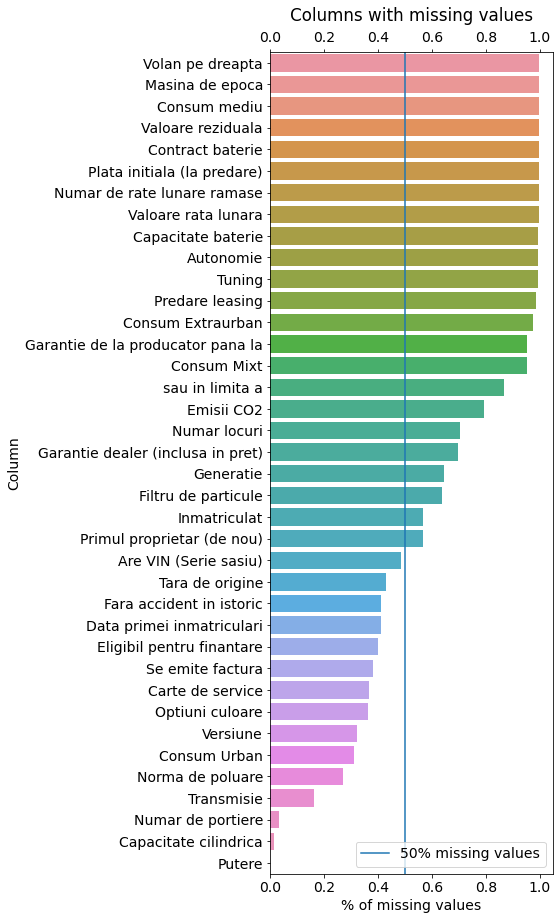

In [7]:
missing_pct = (df.isna().sum() / len(df)).rename("missing")
missing_pct = missing_pct[missing_pct > 0]
missing_pct = missing_pct.reset_index()

fig = plt.figure(figsize=(8, 0.25 * df.shape[1]))
sns.barplot(
    data=missing_pct.sort_values(by="missing", ascending=False),
    y="index", x="missing",
)
plt.axvline(x=0.5, label="50% missing values")
plt.xlabel("% of missing values")
plt.ylabel("Column")
plt.title("Columns with missing values", pad=10)
plt.tick_params(axis="x", top=True, labeltop=True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Price

Most of the cars have prices expressed in euros.

In [8]:
df["Pret"].apply(lambda s: s[-3:]).value_counts()

EUR    12098
RON        8
Name: Pret, dtype: int64

We can probably discard cars with RON prices, since there are so few of them. Or we can convert them to EUR.

In [9]:
df[["Pret", "Marca", "Model", "Putere", "Url"]][~df["Pret"].str.endswith("EUR")]

,Pret,Marca,Model,Putere,Url
292,14 500 RON,Fiat,Doblo,77 CP,https://www.autovit.ro/anunt/fiat-doblo-ID7GVY...
968,199 000 RON,Toyota,Land Cruiser,177 CP,https://www.autovit.ro/anunt/toyota-land-cruis...
1814,9 490 RON,Renault,Koleos,150 CP,https://www.autovit.ro/anunt/renault-koleos-2-...
6104,2 100 RON,Fiat,Panda,54 CP,https://www.autovit.ro/anunt/fiat-panda-1-1-ID...
7030,37 000 RON,Mercedes-Benz,Vito,109 CP,https://www.autovit.ro/anunt/mercedes-benz-vit...
8426,68 900 RON,Subaru,Outback,150 CP,https://www.autovit.ro/anunt/subaru-outback-2-...
8976,36 900 RON,Volvo,V70,163 CP,https://www.autovit.ro/anunt/volvo-v70-d3-gear...
10713,6 950 RON,Renault,Scenic,110 CP,https://www.autovit.ro/anunt/renault-scenic-ID...


In [10]:
def parse_romanian_float(float_str: str) -> float:
    return float(float_str.replace(",", "."))


def parse_price(price_str: str) -> float:
    def parse_number(num_str: str) -> float:
        # Prices seem to contain spaces.
        num_str = num_str.replace(" ", "")
        return parse_romanian_float(num_str)

    if price_str.endswith("EUR"):
        return parse_number(price_str[:-3])

    if price_str.endswith("RON"):
        RON_TO_EUR = 0.21
        return parse_number(price_str[:-3]) * RON_TO_EUR

    return -1


df["Pret parsed"] = df["Pret"].apply(parse_price)
pd.DataFrame({"original": df["Pret"], "converted": df["Pret parsed"]})


,original,converted
0,16 999 EUR,16999.0
1,12 500 EUR,12500.0
2,14 994 EUR,14994.0
3,5 000 EUR,5000.0
4,17 800 EUR,17800.0
...,...,...
12224,6 990 EUR,6990.0
12225,18 189 EUR,18189.0
12226,17 800 EUR,17800.0
12227,6 790 EUR,6790.0


There are a few outliers with huge prices, which we can probably eliminate.

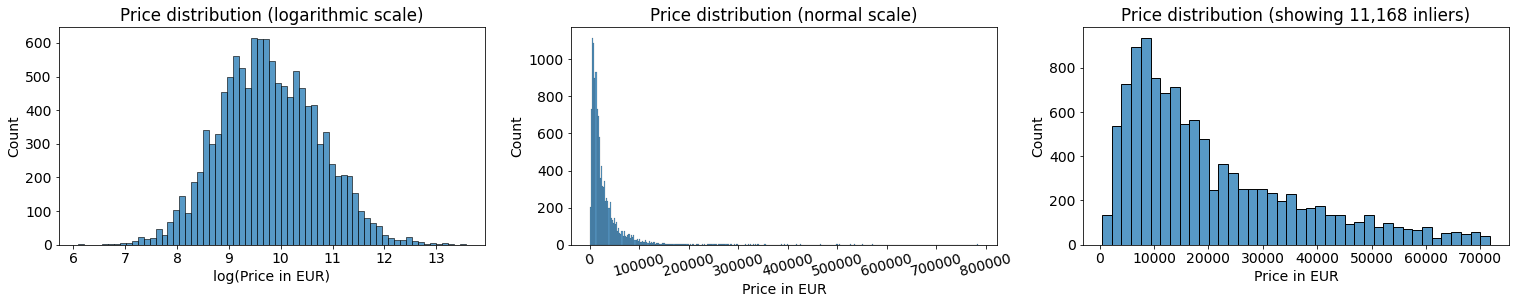

In [11]:
inlier_prices = df["Pret parsed"][utils.inlier_mask(df["Pret parsed"])]

fig, ax = plt.subplots(1, 3, figsize=(26, 4))
sns.histplot(np.log(df["Pret parsed"]), ax=ax[0])
ax[0].set_title("Price distribution (logarithmic scale)")
ax[0].set_xlabel("log(Price in EUR)")
sns.histplot(df["Pret parsed"], ax=ax[1])
ax[1].set_title("Price distribution (normal scale)")
ax[1].set_xlabel("Price in EUR")
ax[1].tick_params(axis="x", rotation=15)
sns.histplot(inlier_prices, ax=ax[2])
ax[2].set_title(f"Price distribution (showing {len(inlier_prices):,} inliers)")
ax[2].set_xlabel("Price in EUR")
plt.show()


## Consumption

I believe we can use consumption information to predict the price. Maybe we can impute missing consumption values using the mean, because the distribution seems nice?

A big number of cars have consumption information, but they are split between multiple types.

In [12]:
consumption_cols = df.columns[df.columns.str.startswith("Consum")].tolist()
print(consumption_cols)
print()

print("Have consumption info:")
print(df[consumption_cols].notnull().any(axis=1).value_counts())
print()

print("Have info, by type:")
df[consumption_cols].apply(lambda s: s.notnull().value_counts())

['Consum Mixt', 'Consum Urban', 'Consum Extraurban', 'Consum mediu']

Have consumption info:
True     8577
False    3529
dtype: int64

Have info, by type:


,Consum Mixt,Consum Urban,Consum Extraurban,Consum mediu
False,11512,3777,11789,12072
True,594,8329,317,34


There are both gas(?) cars and a small number of electric cars.

In [13]:
def parse_consumption(cons_str: str) -> float:
    if cons_str.endswith("l/100km"):
        liters = re.match(r"(\d+,?\d*) l/100km", cons_str).group(1)
        return parse_romanian_float(liters)

    if cons_str.endswith("kWh/100km"):
        # This is probably wrong.
        KWH_TO_LPG = 0.145
        kilowatts = re.match(r"(\d+,?\d*) kWh/100km", cons_str).group(1)
        return parse_romanian_float(kilowatts) * KWH_TO_LPG

    raise ValueError(f"not familiar with measurement unit of {cons_str}")


# Reshape all consumptions into a list.
to_convert = df[consumption_cols].to_numpy().reshape(-1)
# Discard missing values.
to_convert = pd.Series(to_convert[pd.notnull(to_convert)])

pd.DataFrame({
    "original": to_convert,
    "converted": to_convert.map(parse_consumption),
})


,original,converted
0,5 l/100km,5.0
1,"6,60 l/100km",6.6
2,"3,50 l/100km",3.5
3,"4,70 l/100km",4.7
4,"5,10 l/100km",5.1
...,...,...
9269,"8,70 l/100km",8.7
9270,"6,90 l/100km",6.9
9271,"5,70 l/100km",5.7
9272,6 l/100km,6.0


"Consum mediu" seems to only belong to electric cars, that's probably why their values are so small (bad conversion).

If all consumption types have similar distributions, I guess we can combine all of them into a single "Consumption" feature.

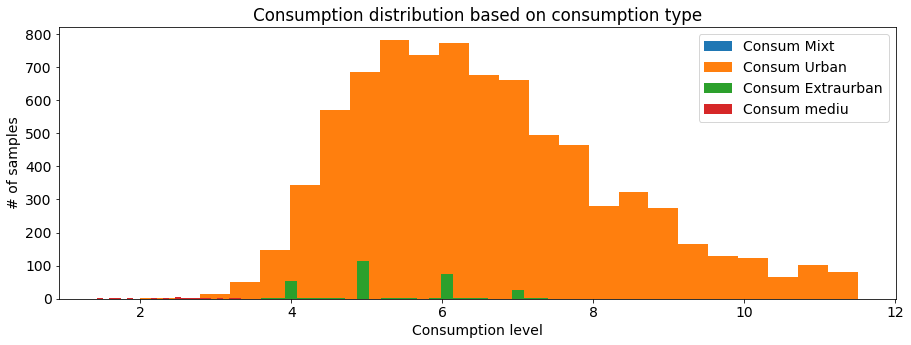

In [14]:
gas = df[consumption_cols]
gas = gas.applymap(lambda s: parse_consumption(s) if pd.notnull(s) else s)

plt.figure(figsize=(15, 5))
for col_name in consumption_cols:
    series = gas[col_name]
    series = series[series.notnull()]

    # Remove outliers.
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    series = series[(q1 - 1.5*iqr <= series) & (series <= q3 + 1.5*iqr)]

    plt.hist(series, bins=24, label=col_name)

plt.title("Consumption distribution based on consumption type")
plt.xlabel("Consumption level")
plt.ylabel("# of samples")
plt.legend()
plt.show()


Correlation coeff: 0.21113048609142815


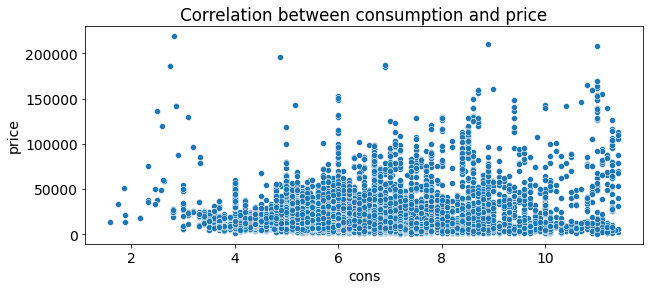

In [15]:
aux = pd.DataFrame({
    "cons": gas.mean(axis=1),
    "price": df["Pret parsed"],
})

# Removing outliers seems important.
q1 = aux["cons"].quantile(0.25)
q3 = aux["cons"].quantile(0.75)
iqr = q3 - q1
aux = aux[(q1-1.5*iqr <= aux["cons"]) & (aux["cons"] <= q3+1.5*iqr)]

corr_coeff = aux["cons"].corr(aux["price"])
print(f"Correlation coeff: {corr_coeff}")

plt.figure(figsize=(10, 4))
sns.scatterplot(data=aux, x="cons", y="price")
plt.title("Correlation between consumption and price")
plt.show()
